##  Predicting the amount of gold recovered from gold ore

Data is provided on gold ore extraction and purification. A machine learning model will be built to help optimize the production and eliminate unprofitable parameters.

### 1. Preparing the data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor

In [ ]:
df_train = pd.read_csv("/datasets/gold_recovery_train.csv")

In [ ]:
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")

In [ ]:
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")

In [ ]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [ ]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [ ]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [ ]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [ ]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


#### 1.2. Checking that recovery is calculated correctly



In [ ]:
C = df_train['rougher.output.concentrate_au'].dropna()
F = df_train['rougher.input.feed_au'].dropna()
T = df_train['rougher.output.tail_au'].dropna()

In [ ]:
df_train['recovery'] = ((C * (F - T)) / (F * (C - T))) * 100

NA values are not included in the recovery calculation because they are not numbers and cannot be computed properly.

In [ ]:
print("MAE:", np.sum(np.abs(df_train['recovery']-df_train['rougher.output.recovery'])) / len(df_train['rougher.output.recovery']))

MAE: 8.00350954615662e-15


The mean absolute error indicates the mean of the absolute values when calculating the differences between the forecasted value and the actual value. Absolute error is calculated to cancel out the difference between underfitting and overfitting. 

It measures accuracy for continuous variables. The resulting MAE here is a very small number, indicating that the error for recovery is low.

#### 1.3. Analyzing the features not available in the test set

In [ ]:
df_train.loc[:, sorted(set(df_train.columns).difference(set(df_test.columns)))].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 35 columns):
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_au                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
primary_cleaner.output.concentrate_ag                 16778 non-null float64
primary_cleaner.output.concentrate_au                 16778 non-null float64
primary_cleaner.output.concentrate_pb       

There are 35 columns on the training set that do not exist on the test set. Their datatypes are all float64 and consist of `output` and `calculation` features.

Targets `rougher.output.recovery` and `final.output.recovery` do not exist on the test set and will be merged from the full set.

The remaining features will be dropped from the training set to match the features available on the test set.

#### 1.4. Performing data preprocessing.

#### Fill NA values

In [ ]:
df_train.fillna(method='ffill', inplace=True)

In [ ]:
df_test.fillna(method='ffill', inplace=True)

In [ ]:
df_full.fillna(method='ffill', inplace=True)

NA values are filled using the `ffill` method because the project description had stated that parameters that are next to each other in terms of time are often similar.

#### Merge `rougher.output.recovery` and `final.output.recovery` targets from full set into test set

In [ ]:
df_full_test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], how="left", on="date")

In [ ]:
df_full_test.shape

(5856, 55)

#### Exclude columns in `df_train` that are not present in `df_full_test`

In [ ]:
df_train_test = df_train[df_full_test.columns]

In [ ]:
df_train_test.shape

(16860, 55)

### Conclusion

3 datasets: `gold_recovery_train.csv`, `gold_recovery_test.csv`, and `gold_recovery_full.csv` were opened and examined.

The MAE for recovery was checked to see if the `rougher.output.recovery` feature was calculated correctly. The resulting MAE was 8.00350954615662e-15.

All datatypes were set correctly, and there were a few null values found for each column. The test dataset has less features than the other two datasets and is missing the two targets, `rougher.output.recovery` and `final.output.recovery`, which were soon obtained from `gold_recovery_full`.

NA values were filled with the `ffill` method, because it was given that parameters that are next to each other in terms of time are often similar.

Columns found in the training set that were not present in the test set were removed.

### 2. Analyzing the data

#### 2.1. Checking how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage

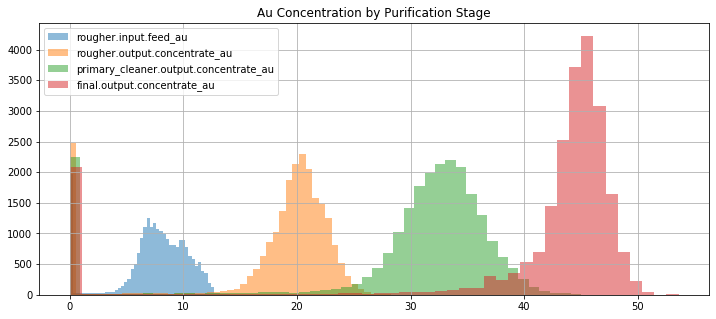

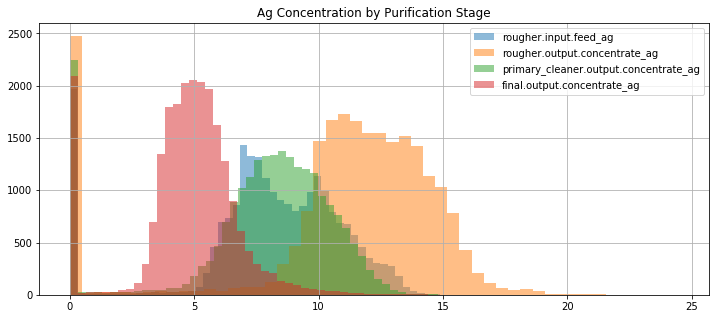

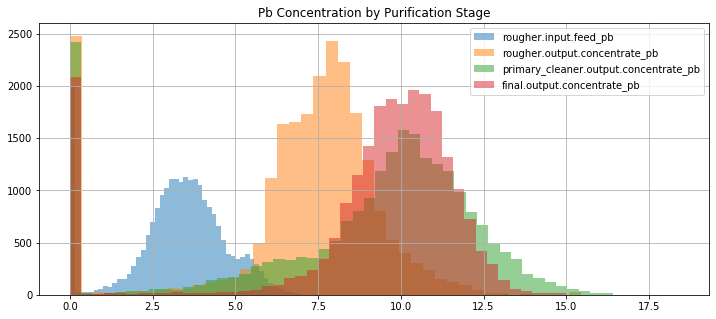

In [ ]:
elements = ['au', 'ag', 'pb']

for ele in elements:
    plt.figure(figsize=(12,5))
    plt.title(f'{ele.capitalize()} Concentration by Purification Stage')
    df_full[f'rougher.input.feed_{ele}'].hist(alpha=0.5, bins=50, label=f'rougher.input.feed_{ele}')
    df_full[f'rougher.output.concentrate_{ele}'].hist(alpha=0.5, bins=50, label=f'rougher.output.concentrate_{ele}')
    df_full[f'primary_cleaner.output.concentrate_{ele}'].hist(alpha=0.5, bins=50, label=f'primary_cleaner.output.concentrate_{ele}')
    df_full[f'final.output.concentrate_{ele}'].hist(alpha=0.5, bins=50, label=f'final.output.concentrate_{ele}')
    plt.legend()

As the number of purification stages that Au undergoes increases, the more concentration is obtained.

Ag has different results: Ag concentration is highest right after the Floation stage and decreases after each purification stage.

The concentration of Pb increases after each purification stage, although the change from the primary cleaner to the final output is miniscule.

#### 2.2. Comparing the feed particle size distributions in the training set and in the test set

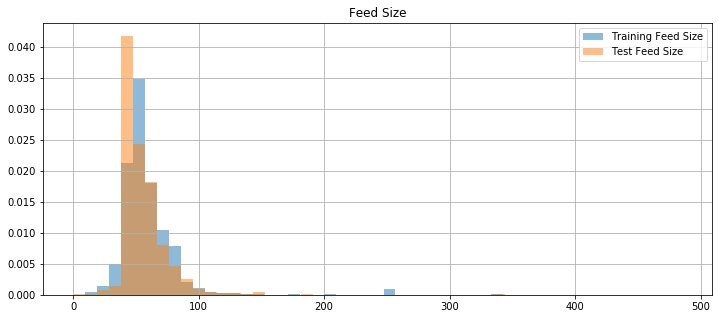

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Feed Size')
df_train_test['rougher.input.feed_size'].hist(alpha=0.5, bins=50, label='Training Feed Size', density=True)
df_full_test['rougher.input.feed_size'].hist(alpha=0.5, bins=50, label='Test Feed Size', density=True)
plt.legend()

In [ ]:
df_train_test['rougher.input.feed_size'].describe()

count    16860.000000
mean        60.188595
std         30.522242
min          9.659576
25%         47.548897
50%         54.066003
75%         65.397249
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [ ]:
df_full_test['rougher.input.feed_size'].describe()

count    5856.000000
mean       55.898866
std        22.707969
min         0.046369
25%        43.852884
50%        49.964796
75%        61.628003
max       477.445473
Name: rougher.input.feed_size, dtype: float64

After comparing the distributions, means, and medians, the training set and the test set do not appear to vary significantly.

#### 2.3. Examining the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate

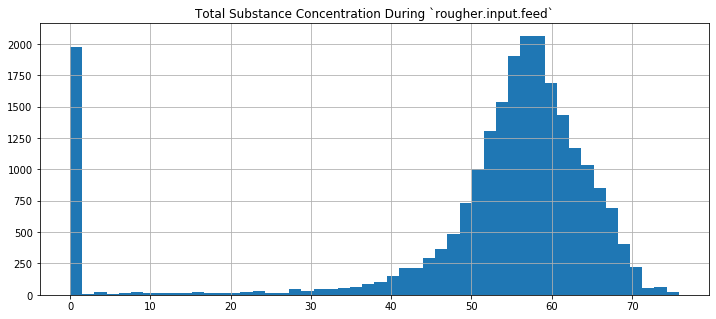

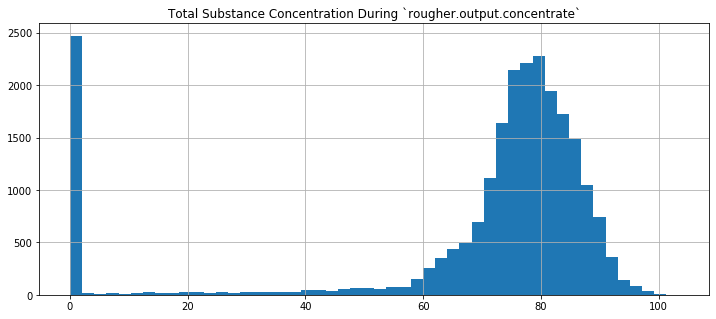

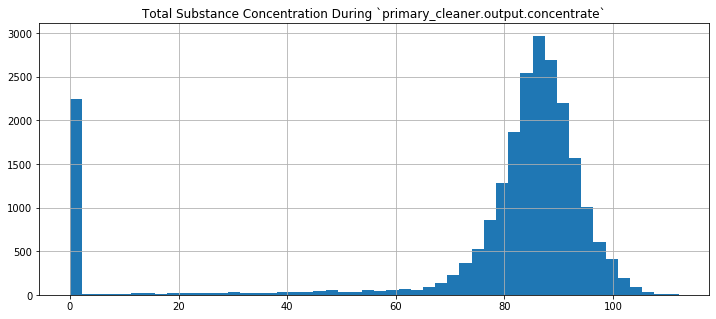

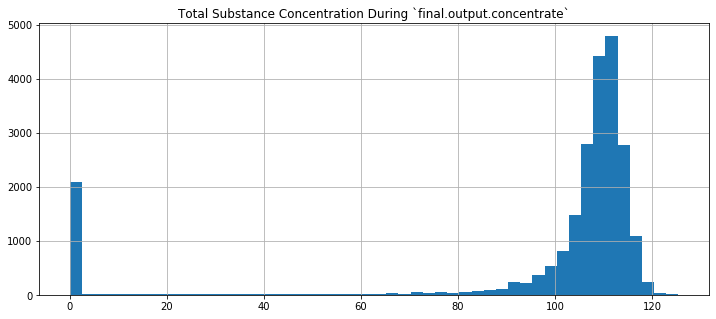

In [ ]:
stages = ['rougher.input.feed_', 
           'rougher.output.concentrate_', 
           'primary_cleaner.output.concentrate_', 
           'final.output.concentrate_']

for stage in stages:
    plt.figure(figsize=(12,5))
    plt.title(f'Total Substance Concentration During `{stage[:-1]}`')
    df_full[[f'{stage}au', f'{stage}au', f'{stage}pb', f'{stage}sol']].sum(1).hist(bins=50)

The histograms show that after each stage, total substance concentration increases.

There are many 0 values in each graph that would be better if they were removed. It is possible that a few mixtures that were fed into the float banks actually did not contain any of the substances that are currently being analyzed, resulting in 0 values.

In [ ]:
df_full.shape

(22716, 87)

In [ ]:
substances = ['au', 'ag', 'pb', 'sol']

for substance in substances:
    df_full = df_full.loc[(df_full[f'rougher.input.feed_{substance}'] >= 0.05) & 
                          (df_full[f'rougher.output.concentrate_{substance}'] >= 0.05) &
                          (df_full[f'primary_cleaner.output.concentrate_{substance}'] >= 0.05) &
                          (df_full[f'final.output.concentrate_{substance}'] >= 0.05)
                         ]

In [ ]:
df_full.shape

(19468, 87)

Concentrations less than 0.05 were dropped, leaving 85.7% of the original `df_full` dataset.

In [ ]:
df_train_test.shape

(16860, 55)

In [ ]:
df_full_test.shape

(5856, 55)

In [ ]:
substances = ['au', 'ag', 'pb', 'sol']

for substance in substances:
    df_train_test = df_train_test.loc[df_train_test[f'rougher.input.feed_{substance}'] >= 0.05]
    df_full_test = df_full_test.loc[df_full_test[f'rougher.input.feed_{substance}'] >= 0.05]

In [ ]:
df_train_test.shape

(15204, 55)

In [ ]:
df_full_test.shape

(5464, 55)

Likewise, concentrations of less than 0.05 were dropped for `df_train_test` and `df_full_test`, leaving 90.2% of the original `df_train_test` set and 93.3% of the originating `df_full_test`.

#### Resulting histograms after removing concentrations less than 0.05:

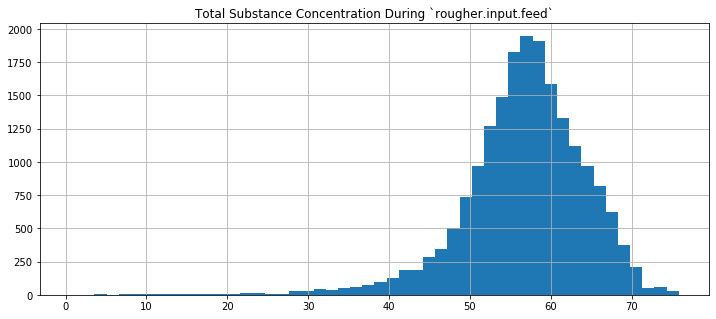

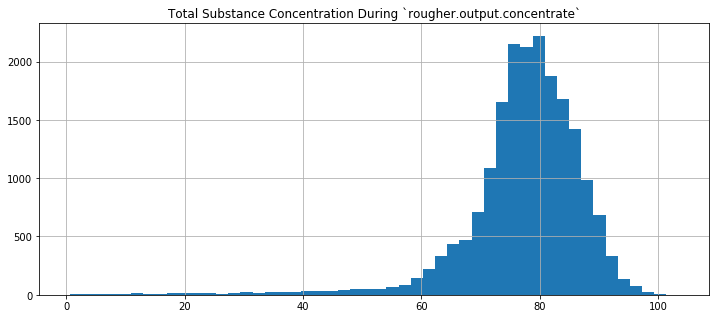

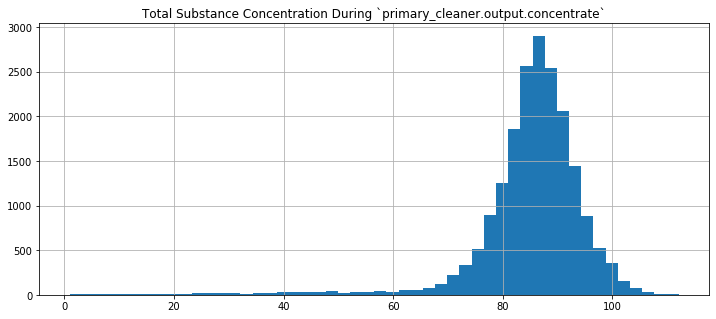

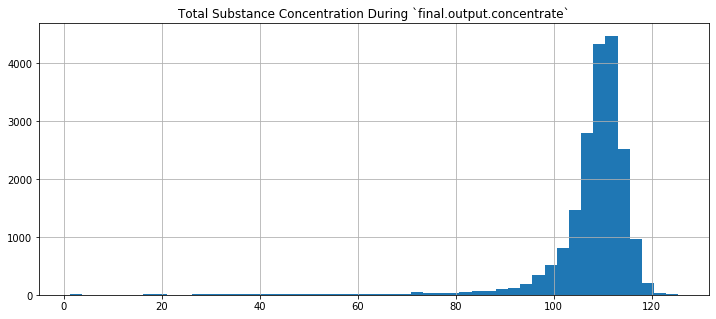

In [ ]:
stages = ['rougher.input.feed_', 
           'rougher.output.concentrate_', 
           'primary_cleaner.output.concentrate_', 
           'final.output.concentrate_']

for stage in stages:
    plt.figure(figsize=(12,5))
    plt.title(f'Total Substance Concentration During `{stage[:-1]}`')
    df_full[[f'{stage}au', f'{stage}au', f'{stage}pb', f'{stage}sol']].sum(1).hist(bins=50)

#### Conclusion

The overall data was analyzed in this step.

It was found that as the number of purification stages that Au undergoes increases, the more concentration is obtained.

Ag had different results: Ag concentration is highest right after the Floation stage and decreases after each purification stage.

The concentration of Pb increased after each purification stage, although the change from the primary cleaner to the final output wass miniscule.

Next, the feed particle size distributions were compared and found to have similar distributions.

The total concentrations of all substances at each processing stage increased after each stage. 0 values were discovered in the histograms and dropped from all three datasets.

### 3. Build the model.

#### 3.1. Writing a function to calculate the final sMAPE value

In [ ]:
def smape(y, y_pred):
    def smape_stage(idx, name):
        name = np.mean( ( np.abs(y.iloc[:, idx] -  y_pred[:, idx]) / ( (np.abs(y.iloc[:, idx]) + np.abs(y_pred[:, idx])) / 2) )) * 100
        return name

    final_smape = smape_stage(0, 'smape_rougher') * .25 + smape_stage(1, 'smape_final') * .75
    return final_smape

#### 3.2. Training different models and evaluating them using cross-validation

In [ ]:
features_train = df_train_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_train_test[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
features_test = df_full_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test = df_full_test[['rougher.output.recovery', 'final.output.recovery']]

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train)
scaler.transform(features_train, copy=False)
scaler.transform(features_test, copy=False)

array([[ 1.86584722,  1.76079765,  1.25193333, ..., -0.36125391,
         1.25832426,  0.18811947],
       [ 1.97436761,  1.7591911 ,  1.25193333, ..., -0.36422771,
         0.9678005 ,  0.18534325],
       [ 1.9712358 ,  1.16096127,  0.77619109, ..., -0.35628099,
         0.96347903,  0.16507815],
       ...,
       [ 0.92836727,  2.04548219,  1.23571446, ..., -0.36132558,
        -1.79586043,  0.23655486],
       [ 1.13071542,  1.88765751,  1.23571446, ..., -0.35888476,
        -1.79058369,  0.17689409],
       [ 1.17466907,  1.76157499,  1.23571446, ..., -0.36839817,
        -1.79472418,  0.16148553]])

In [ ]:
smape_score = make_scorer(smape, greater_is_better=False)

#### Random Forest Regression

In [ ]:
model_2 = RandomForestRegressor(random_state=99, n_estimators=10)
cross_val_score(model_2, features_train, target_train, scoring=smape_score, cv=5).mean()

-14.09325069933833

#### Linear Regression

In [ ]:
model_3 = LinearRegression()
cross_val_score(model_3, features_train, target_train, scoring=smape_score, cv=5).mean()

-13.752248072690207

#### Lasso Regression

In [ ]:
lasso = Lasso().fit(features_train, target_train)
cross_val_score(lasso, features_train, target_train, scoring=smape_score, cv=5).mean()

-11.575690367753158

#### Elastic-Net Regression

In [ ]:
elastic_net = ElasticNet().fit(features_train, target_train)
cross_val_score(elastic_net, features_train, target_train, scoring=smape_score, cv=5).mean()

-11.48645384878218

The model with the best cross-validation score here using default parameters is the Elastic-Net model, with a score of 11.49.

#### Tuning Elastic-Net Regression

In [ ]:
for l1 in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    tuned_elastic = ElasticNet(l1_ratio=l1)
    print("---", l1, "---")
    print(cross_val_score(tuned_elastic, features_train, target_train, scoring=smape_score, cv=5).mean())

--- 0.1 ---
-11.510751111849373
--- 0.2 ---
-11.458375877425512
--- 0.3 ---
-11.46641522675019
--- 0.4 ---
-11.47996490300015
--- 0.5 ---
-11.48645384878218
--- 0.6 ---
-11.504910276948701
--- 0.7 ---
-11.526318062786336
--- 0.8 ---
-11.548517778228012
--- 0.9 ---
-11.568461433534562
--- 1 ---
-11.575690367753158


The best l1_ratio value found for the Elastic-Net regression is '0.2', yielding a cross-validation score of 11.46%.

#### Checking the quality of the tuned model using the test set

In [ ]:
elastic = ElasticNet(l1_ratio=0.2)
elastic.fit(features_train, target_train)
elastic_predict = elastic.predict(features_test)

smape(target_test, elastic_predict)

9.791003543783788

#### Baseline Model

In [ ]:
dummy_score = DummyRegressor(strategy='mean')
dummy_score.fit(features_train, target_train)
dum_predict = dummy_score.predict(features_test)
smape(target_test, dum_predict)

11.384818038486117

### Conclusion

A function for the final sMAPE was created and used to evaluate the best model. 

Feature values were scaled and a scorer was created using the sMAPE function.

The models were trained using `Random Forest Regression`, `Linear Regression`. `Lasso`, and `Elastic-Net`. 

The Elastic-Net model performed the best out of the four models, and hyperparameters were tuned to get the final sMAPE score of 9.79%. This is an improvement to the baseline sMAPE based on the mean, which is 11.38%.